Set Up Your Environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Your Data

In [10]:
# Load the dataset
data = pd.read_csv('/content/ECOMM DATA.xlsx - Orders.csv')

Explore the Data

In [4]:
print(data.head(5))

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891   31/7/2012   31/7/2012      Same Day    RH-19495   
1   26341    IN-2013-77878    5/2/2013    7/2/2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17/10/2013  18/10/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   28/1/2013   30/1/2013   First Class    KM-16375   
4   47221     SG-2013-4320   5/11/2013   6/11/2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
print(data.describe())

            Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.810000      24.450000  
m

In [11]:
print(data.shape)

(51290, 24)


In [12]:
print(data.isnull().sum())


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Clean the Data

In [16]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['float', 'int']).columns

# Fill missing values with the mean for numerical columns only
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [15]:
data.drop_duplicates(inplace=True)


Compute Revenue Measures


In [18]:
total_sales = data['Sales'].sum()
print(f'Total Sales: {total_sales}')


Total Sales: 12642501.909880001


In [19]:
average_sales = data['Sales'].mean()
print(f'Average Sales: {average_sales}')


Average Sales: 246.49058120257362


Analyze Sales Trends Over Time

In [22]:
# Convert 'Order Date' column to datetime objects
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Now you can extract the month
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum()


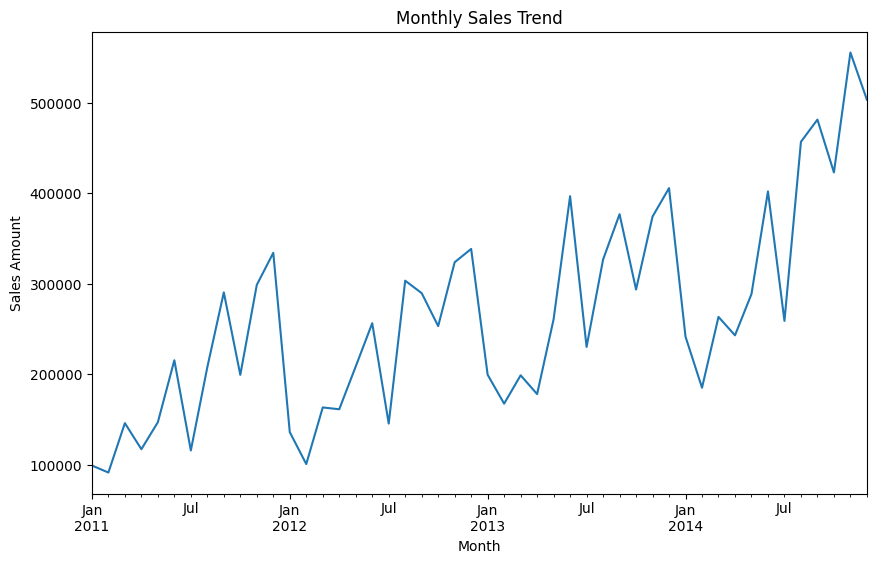

In [23]:
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()


Determine Best-Selling Products

In [24]:
best_selling_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)


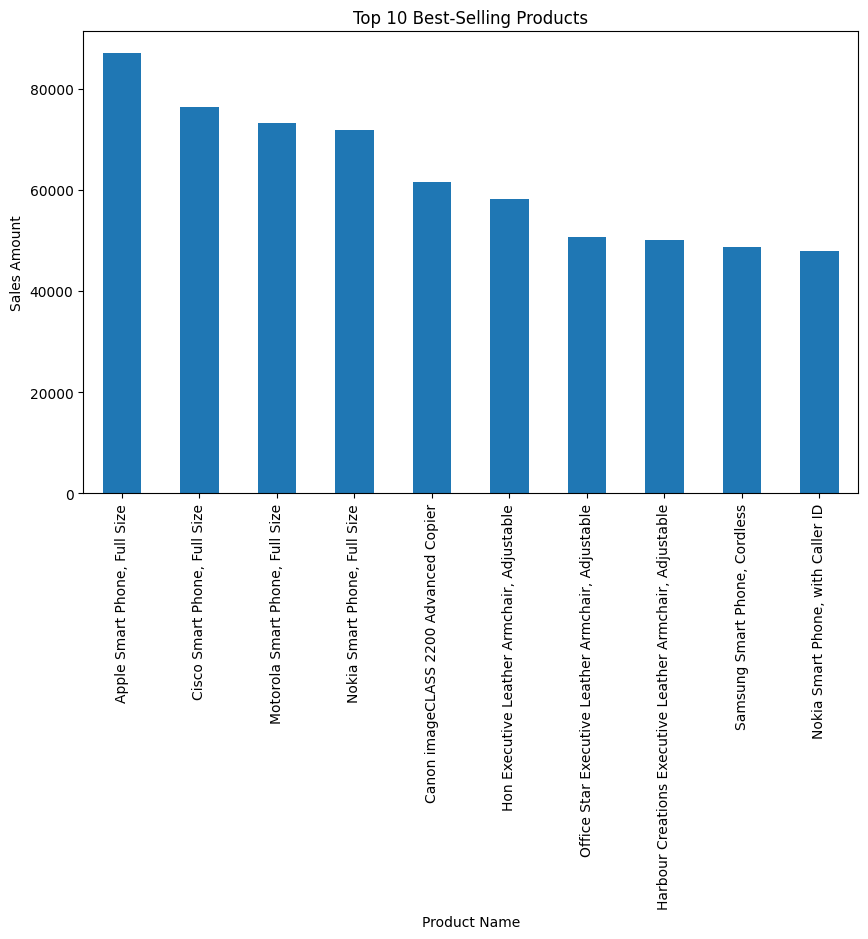

In [25]:
plt.figure(figsize=(10,6))
best_selling_products.head(10).plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Sales Amount')
plt.show()


Determine Best-Selling Products

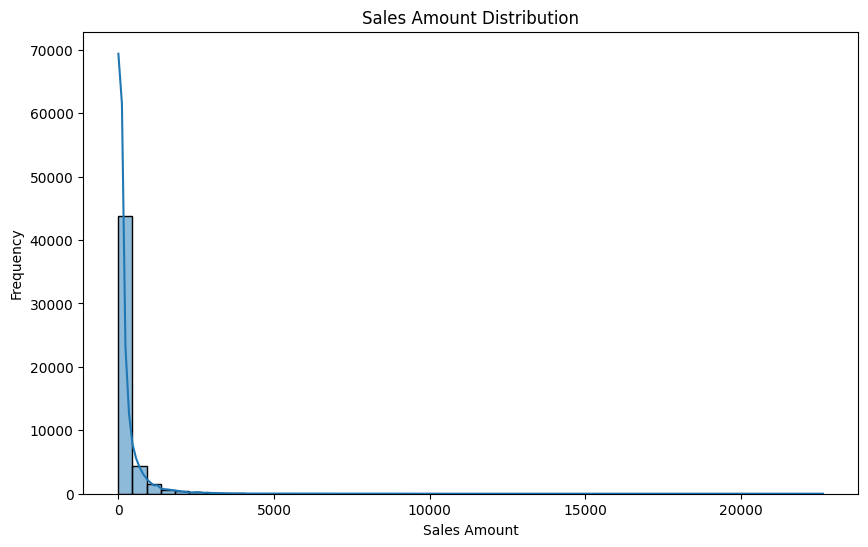

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


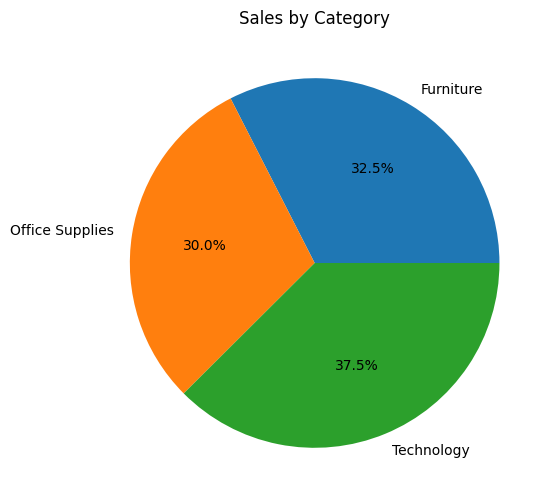

In [27]:
sales_by_category = data.groupby('Category')['Sales'].sum()
plt.figure(figsize=(10,6))
sales_by_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Category')
plt.ylabel('')
plt.show()


Summary Report

In [28]:
summary = {
    'Total Sales': total_sales,
    'Average Sales': average_sales,
    'Best-Selling Products': best_selling_products.head(10).to_dict()
}
print(summary)


{'Total Sales': 12642501.909880001, 'Average Sales': 246.49058120257362, 'Best-Selling Products': {'Apple Smart Phone, Full Size': 86935.7786, 'Cisco Smart Phone, Full Size': 76441.5306, 'Motorola Smart Phone, Full Size': 73156.303, 'Nokia Smart Phone, Full Size': 71904.5555, 'Canon imageCLASS 2200 Advanced Copier': 61599.824, 'Hon Executive Leather Armchair, Adjustable': 58193.4841, 'Office Star Executive Leather Armchair, Adjustable': 50661.684, 'Harbour Creations Executive Leather Armchair, Adjustable': 50121.516, 'Samsung Smart Phone, Cordless': 48653.46, 'Nokia Smart Phone, with Caller ID': 47877.7857}}


In [29]:
with pd.ExcelWriter('sales_analysis_report.xlsx') as writer:
    data.to_excel(writer, sheet_name='Sales Data')
    monthly_sales.to_excel(writer, sheet_name='Monthly Sales')
    best_selling_products.head(10).to_excel(writer, sheet_name='Best-Selling Products')
